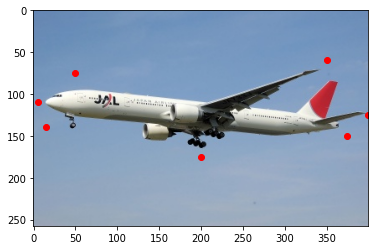

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fname = "images/airplane_src.jpg"

image = cv2.imread(fname)
# ploy curve points
poly = np.array([ [5, 110], [15, 140], [200, 175], [375, 150], [399, 125], [350, 60], [50, 75] ], np.int32)
src_mask = np.zeros(image.shape, image.dtype)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))
im2 = image[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)
plt.scatter(poly[:, 0], poly[:, 1], color='r')
plt.show()

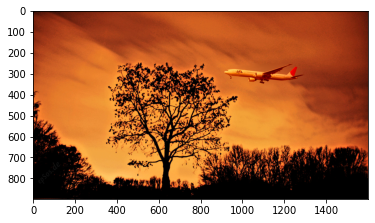

(898, 1600, 3)

In [27]:
dst = cv2.imread("images/sky.jpeg")
# dst center
center = (1100,300)
output = cv2.seamlessClone(image, dst, src_mask, center, cv2.NORMAL_CLONE)
im2 = output[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)
# plt.scatter([1100], [300], color='r')
plt.show()
#cv2.imwrite("images/opencv-seamless-cloning-example.jpg", output);
dst.shape

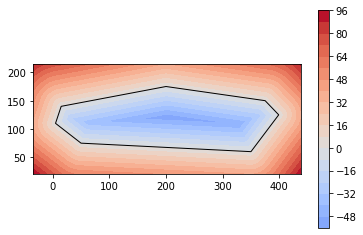

In [4]:
import dmsh

geo = dmsh.Polygon(poly)
X, cells = dmsh.generate(geo, 30)
geo.show()

In [5]:
X.shape

(51, 2)

In [6]:
cells.shape

(69, 3)

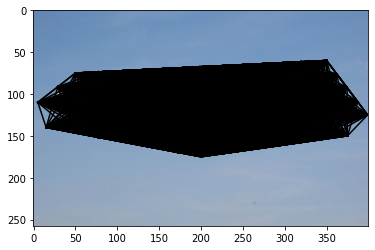

In [7]:
im2 = image[:,:,::-1]
plt.imshow(im2)
N = X.shape[0]
K = 0
for i in range(N):
    pt1_x, pt1_y = X[i]
    for j in range(i, N):
        pt2_x, pt2_y = X[j]
        x_values = [pt1_x, pt2_x]
        y_values = [pt1_y, pt2_y]
        plt.plot(x_values, y_values, color='black')
        K += 1

In [36]:
# MVC
import numpy as np
def MVC(x, curve):
    N = len(curve)
    W = np.zeros((N, 1))
    for n in range(N):
        pre = n
        now = (n+1) % N
        nxt = (n+2) % N
        vec_pre = curve[pre] - x
        vec_now = curve[now] - x
        vec_nxt = curve[nxt] - x
        cosine_angle1 = np.dot(vec_pre, vec_now) / (np.linalg.norm(vec_pre) * np.linalg.norm(vec_now))
        angle1 = np.arccos(cosine_angle1)
        cosine_angle2 = np.dot(vec_now, vec_nxt) / (np.linalg.norm(vec_now) * np.linalg.norm(vec_nxt))
        angle2 = np.arccos(cosine_angle2)
        w = (np.tan(angle1 / 2) + np.tan(angle2 / 2)) / np.linalg.norm(vec_now)
        W[n] = w
    L = W / W.sum()
    return L

(898, 1600, 3)
[976 210]
[986 240]
[1171  275]
[1346  250]
[1370  225]
[1321  160]
[1021  175]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[169  83 202]
[169  85 204]
[169  87 206]
[170  92 213]
[163  69 187]
[0 0 0]
[167  73 192]
[167  75 194]
[168  77 196]
[168  79 198]
[0 0 0]
[164  80 200]
[165  83 204]
[166  86 207]
[167  89 211]
[0 0 0]
[159  70 189]
[160  70 189]
[163  71 190]
[158  70 190]
[162  72 192]
[163  74 194]
[163  75 195]
[163  77 198]
[161  79 201]
[162  83 206]
[164  88 211]
[166  93 217]
[0 0 0]
[154  69 190]
[153  68 189]
[153  67 189]
[0 0 0]
[158  70 191]
[157  70 192]
[157  71 193]
[159  75 197]
[0 0 0]
[159  83 206]
[161  88 211]
[0 0 0]
[152  65 188]
[153  68 192]
[155  73 197]


/home/master/09/tsunghan/miniconda3/envs/3dtf/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/home/master/09/tsunghan/miniconda3/envs/3dtf/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/home/master/09/tsunghan/miniconda3/envs/3dtf/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()
/home/master/09/tsunghan/miniconda3/envs/3dtf/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  


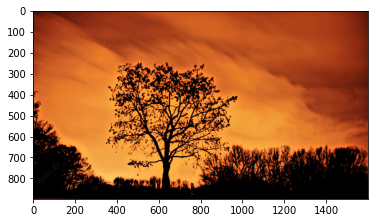

In [46]:
# get target coordinate
target_center = np.array([1100,300])
src_center = np.array([image.shape[0] // 2, image.shape[1] // 2])
# print(src_center, target_center)
translation = target_center - src_center
print(dst.shape)

def count_diff(curve, translation):
    N = len(curve)
    D = np.zeros((N, 3))
    for i, src_x in enumerate(curve):
        trg_x = src_x + translation
        print(trg_x)
        f_pi = image[src_x[1], src_x[0]]
        g_pi = dst[trg_x[1], trg_x[0]]
        D[i] = f_pi - g_pi
    return D

diff = count_diff(poly, translation)


for x in X:
    L = MVC(x, poly)
    trg_x = x + translation
    r_x = np.sum(L * diff, axis=0).astype(np.uint8)
    print(r_x)
    dst[int(trg_x[1]), int(trg_x[0])] += r_x
im2 = dst[:,:,::-1] 	# transform image to rgb
plt.imshow(im2)